In [31]:
import pandas as pd
import scanpy as sc
zeisel = pd.read_csv('../expression_mRNA_17-Aug-2014.txt',sep='\t',index_col=0)
zeisel

C:\Users\10942\AppData\Local\Temp\ipykernel_29608\3284272751.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

,tissue,sscortex,sscortex.1,sscortex.2,sscortex.3,sscortex.4,sscortex.5,sscortex.6,ca1hippocampus,sscortex.7,...,ca1hippocampus.1310,sscortex.1685,sscortex.1686,sscortex.1687,sscortex.1688,ca1hippocampus.1311,ca1hippocampus.1312,sscortex.1689,ca1hippocampus.1313,sscortex.1690
NaN,group #,1,1,1,1,1,1,1,1,1,...,9,9,9,9,9,9,9,9,9,9
NaN,total mRNA mol,21580,21748,31642,32916,21531,24799,31406,20389,23022,...,5893,2509,6458,6959,4323,4585,2559,4015,2896,4460
NaN,well,11,95,33,42,48,13,50,66,29,...,92,49,79,19,68,26,28,4,89,22
NaN,sex,1,-1,-1,1,1,-1,1,-1,1,...,1,-1,-1,1,-1,-1,-1,1,-1,1
NaN,age,21,20,20,21,25,20,25,23,21,...,23,20,21,26,31,23,26,26,26,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gm20738_loc4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm20738_loc6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm21943_loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm21943_loc3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
data = zeisel.iloc[10:,1:].astype(float)
adata = sc.AnnData(data)
adata = adata.transpose()
sc.pp.filter_genes(adata,min_cells=30)
adata.var['std'] = adata.X.std(0)
adata.obs['label'] = list(zeisel.iloc[7])[1:]
adata.obs['subtype'] = list(zeisel.iloc[8])[1:]
Zeisel_dataset = adata[:,adata.var.sort_values('std',ascending=False).iloc[:1000].index].copy()
sc.pp.log1p(Zeisel_dataset)

In [70]:
Zeisel_dataset

AnnData object with n_obs × n_vars = 3005 × 1000
    obs: 'label', 'subtype', 'louvain'
    var: 'n_cells', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'louvain'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [34]:
pd.DataFrame(Zeisel_dataset.X,index=list(Zeisel_dataset.obs_names),columns=list(Zeisel_dataset.var_names)).to_csv('../data/embedding_zeisel/Zeisel_new.csv')

In [37]:
deepsem = sc.read('../out/DeepSEM.h5ad')
deepsem

AnnData object with n_obs × n_vars = 3005 × 1000
    obs: 'label', 'subtype', 'louvain'
    uns: 'label_colors', 'louvain', 'neighbors', 'subtype_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [41]:
deepsem.obs_names

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '2995', '2996', '2997', '2998', '2999', '3000', '3001', '3002', '3003',
       '3004'],
      dtype='object', length=3005)

In [43]:
deepsem.obs['label']

0       endothelial-mural
1           pyramidal CA1
2           pyramidal CA1
3            pyramidal SS
4           pyramidal CA1
              ...        
3000    endothelial-mural
3001     oligodendrocytes
3002     oligodendrocytes
3003         interneurons
3004     oligodendrocytes
Name: label, Length: 3005, dtype: category
Categories (7, object): ['astrocytes_ependymal', 'endothelial-mural', 'interneurons', 'microglia', 'oligodendrocytes', 'pyramidal CA1', 'pyramidal SS']

In [54]:
deepsem.obs['subtype']

0         Vend2
1       CA2Pyr2
2       CA1Pyr1
3       S1PyrL4
4        SubPyr
         ...   
3000      Vend1
3001     Oligo6
3002     Oligo4
3003      Int12
3004     Oligo6
Name: subtype, Length: 3005, dtype: category
Categories (48, object): ['(none)', 'Astro1', 'Astro2', 'CA1Pyr1', ..., 'SubPyr', 'Vend1', 'Vend2', 'Vsmc']

In [38]:
output = sc.read_h5ad('../out/embedding_2.h5ad')
output

AnnData object with n_obs × n_vars = 3005 × 1000

In [45]:
output.obs_names

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '2995', '2996', '2997', '2998', '2999', '3000', '3001', '3002', '3003',
       '3004'],
      dtype='object', length=3005)

In [46]:
true_labels = list(zeisel.iloc[7])[1:]
label_series = pd.Series(true_labels, index=[str(i) for i in range(len(true_labels))])

In [47]:
# 确保数量匹配
assert len(output.obs_names) == len(label_series)

In [48]:
output.obs['label'] = label_series.loc[output.obs_names].values
output

AnnData object with n_obs × n_vars = 3005 × 1000
    obs: 'label'

In [50]:
output.obs['label']

0            interneurons
1            interneurons
2            interneurons
3            interneurons
4            interneurons
              ...        
3000    endothelial-mural
3001    endothelial-mural
3002    endothelial-mural
3003    endothelial-mural
3004    endothelial-mural
Name: label, Length: 3005, dtype: object

In [51]:
for i in range(10):
    print(f"Row {i}:")
    print(zeisel.iloc[i, :10])
# 第六行是cell_id、第七行是label、第八行是subtype、

Row 0:
tissue            group #
sscortex                1
sscortex.1              1
sscortex.2              1
sscortex.3              1
sscortex.4              1
sscortex.5              1
sscortex.6              1
ca1hippocampus          1
sscortex.7              1
Name: nan, dtype: object
Row 1:
tissue            total mRNA mol
sscortex                   21580
sscortex.1                 21748
sscortex.2                 31642
sscortex.3                 32916
sscortex.4                 21531
sscortex.5                 24799
sscortex.6                 31406
ca1hippocampus             20389
sscortex.7                 23022
Name: nan, dtype: object
Row 2:
tissue            well
sscortex            11
sscortex.1          95
sscortex.2          33
sscortex.3          42
sscortex.4          48
sscortex.5          13
sscortex.6          50
ca1hippocampus      66
sscortex.7          29
Name: nan, dtype: object
Row 3:
tissue            sex
sscortex            1
sscortex.1         -1
sscortex.2 

In [52]:
subtype_list = list(zeisel.iloc[8])[1:]
subtype_series = pd.Series(subtype_list, index=[str(i) for i in range(len(subtype_list))])
output.obs['subtype'] = subtype_series.loc[output.obs_names].values

In [53]:
output.obs['subtype']

0       Int10
1       Int10
2        Int6
3       Int10
4        Int9
        ...  
3000    Peric
3001     Vsmc
3002     Vsmc
3003     Vsmc
3004     Vsmc
Name: subtype, Length: 3005, dtype: object

In [69]:
output

AnnData object with n_obs × n_vars = 3005 × 1000
    obs: 'label', 'louvain', 'subtype'
    uns: 'pca', 'neighbors', 'louvain', 'umap', 'label_colors', 'subtype_colors', 'louvain_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [56]:
import pandas as pd
import scanpy as sc
import community as louvain

# 构建邻接图
sc.pp.neighbors(output,n_neighbors=30)
maxn = 2
minn= 0
x = 1
sc.tl.louvain(output,resolution=x,random_state=0)
N =len(set(output.obs['label']))
while len(set(output.obs['louvain'])) !=N:
    if   len(set(output.obs['louvain'])) < N:
            minn = x
            x = (maxn+x) /2
    if   len(set(output.obs['louvain'])) > N:
            maxn= x
            x = (minn+x) /2
    print(x,maxn,minn)
    sc.tl.louvain(output,resolution=x,random_state=0)

0.5 1 0
0.25 0.5 0
0.375 0.5 0.25
0.4375 0.5 0.375
0.40625 0.4375 0.375


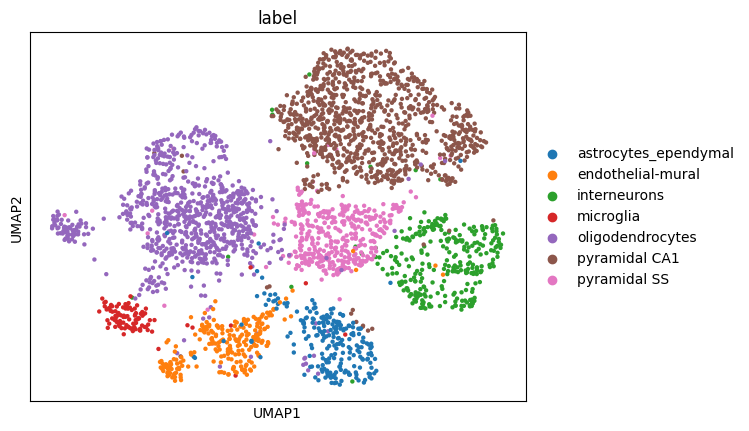

In [61]:
sc.tl.umap(output)
sc.pl.umap(output,color='label')

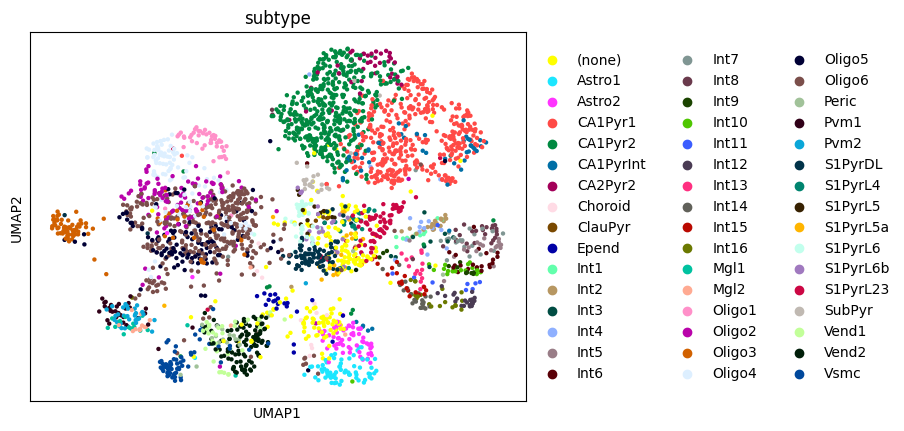

In [62]:
sc.pl.umap(output,color='subtype')

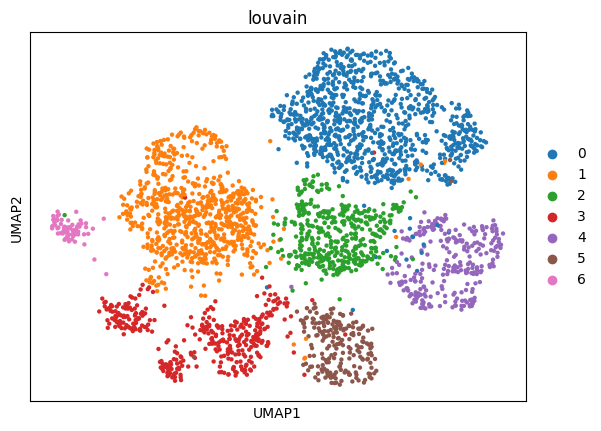

In [63]:
sc.pl.umap(output,color='louvain')

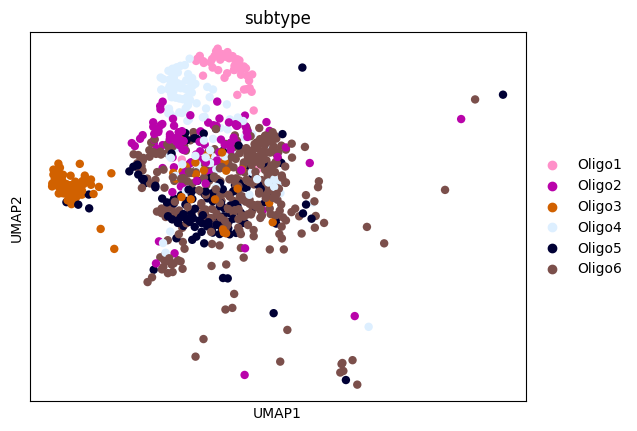

In [58]:
sc.pl.umap(output[output.obs['label']=='oligodendrocytes'],color='subtype')

In [59]:
from sklearn.metrics import adjusted_rand_score,adjusted_mutual_info_score
print(adjusted_rand_score(output.obs['label'],output.obs['louvain']),adjusted_mutual_info_score(output.obs['label'],output.obs['louvain']))

0.8424834813886566 0.8074850679636151


In [75]:
sc.pp.neighbors(Zeisel_dataset,n_neighbors=30)
sc.tl.louvain(Zeisel_dataset,resolution=x,random_state=0)
N =len(set(Zeisel_dataset.obs['label']))
while len(set(Zeisel_dataset.obs['louvain'])) !=N:
    if   len(set(Zeisel_dataset.obs['louvain'])) < N:
            minn = x
            x = (maxn+x) /2
    if   len(set(Zeisel_dataset.obs['louvain'])) > N:
            maxn= x
            x = (minn+x) /2
    print(x,maxn,minn)
    sc.tl.louvain(Zeisel_dataset,resolution=x,random_state=0)

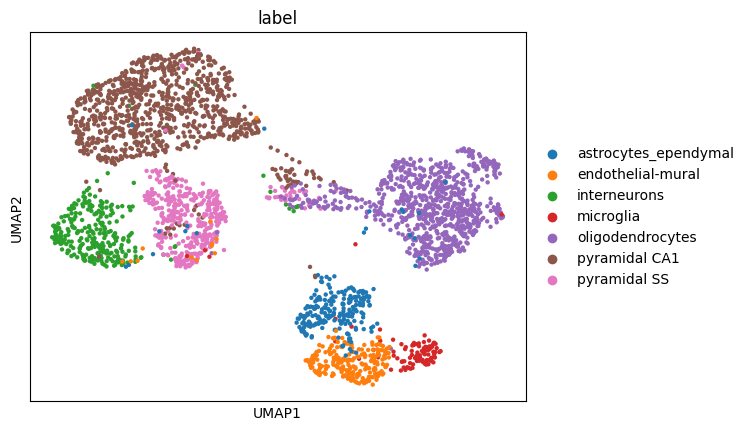

In [76]:
sc.tl.umap(Zeisel_dataset)
sc.pl.umap(Zeisel_dataset,color='label')

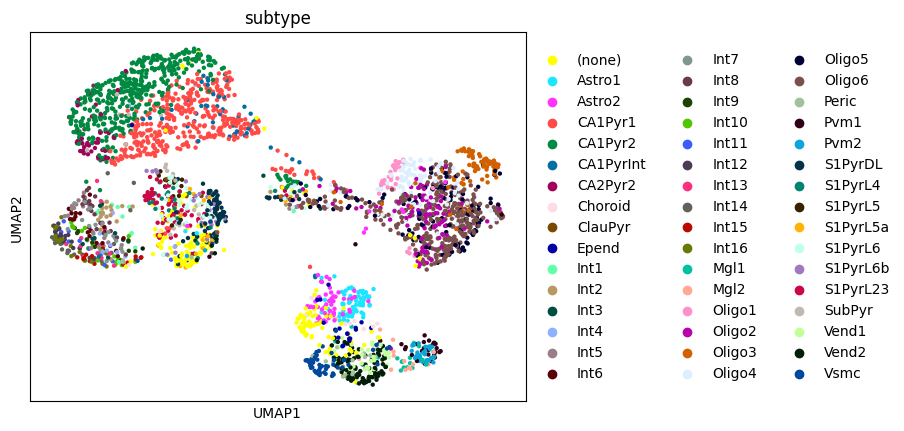

In [77]:
sc.pl.umap(Zeisel_dataset,color='subtype')

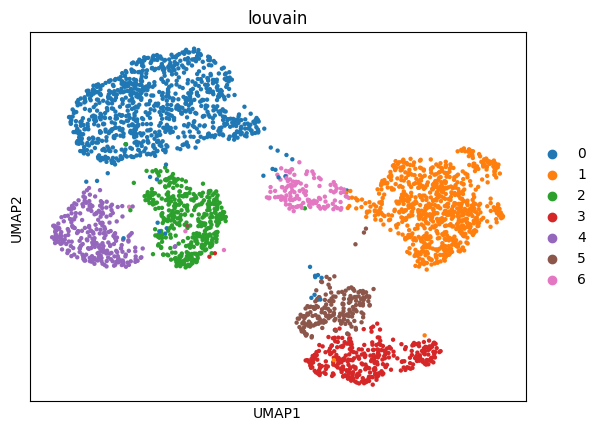

In [78]:
sc.pl.umap(Zeisel_dataset,color='louvain')

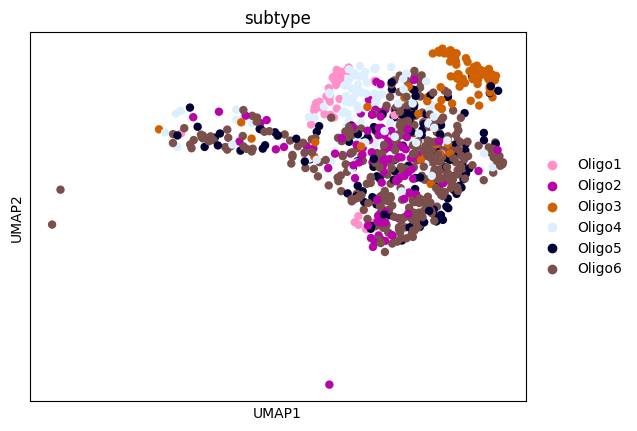

In [80]:
sc.pl.umap(Zeisel_dataset[Zeisel_dataset.obs['label']=='oligodendrocytes'],color='subtype')

In [81]:
from sklearn.metrics import adjusted_rand_score,adjusted_mutual_info_score
print(adjusted_rand_score(Zeisel_dataset.obs['label'],Zeisel_dataset.obs['louvain']),adjusted_mutual_info_score(Zeisel_dataset.obs['label'],Zeisel_dataset.obs['louvain']))

0.8640185501975781 0.8214676052783766


In [60]:

adata1 = output
adata2 = deepsem

# 打印基本结构信息
print("=== File1 (有问题的) ===")
print("X shape:", adata1.X.shape)
print("obs columns:", adata1.obs.columns)
print("var columns:", adata1.var.columns)
print("obsm keys:", list(adata1.obsm.keys()))
print("uns keys:", list(adata1.uns.keys()))

print("\n=== File2 (正常的) ===")
print("X shape:", adata2.X.shape)
print("obs columns:", adata2.obs.columns)
print("var columns:", adata2.var.columns)
print("obsm keys:", list(adata2.obsm.keys()))
print("uns keys:", list(adata2.uns.keys()))


=== File1 (有问题的) ===
X shape: (3005, 1000)
obs columns: Index(['label', 'louvain', 'subtype'], dtype='object')
var columns: Index([], dtype='object')
obsm keys: ['X_pca', 'X_umap']
uns keys: ['pca', 'neighbors', 'louvain', 'umap', 'label_colors', 'subtype_colors', 'louvain_colors']

=== File2 (正常的) ===
X shape: (3005, 1000)
obs columns: Index(['label', 'subtype', 'louvain'], dtype='object')
var columns: Index([], dtype='object')
obsm keys: ['X_pca', 'X_umap']
uns keys: ['label_colors', 'louvain', 'neighbors', 'subtype_colors', 'umap']
